In [ ]:
#Hypothesis0 = party affiliation predicts environmental voting
#Hypothesis1 = environmental donations predict environmental voting better,
# where environ donations = donations from env. groups - donations from pollutions companies

In [2]:
import pandas as pd
from scipy import stats as scs
from matplotlib import pyplot as plt
import numpy as np
df14_con = pd.read_excel('senate_env18_14con.xlsx')
df16_con = pd.read_excel('senate_env18_16con.xlsx')
df18_con = pd.read_excel('senate_env18_18con.xlsx')
df14_pro = pd.read_excel('senate_env18_14pro.xlsx')
df16_pro = pd.read_excel('senate_env18_16pro.xlsx')
df18_pro = pd.read_excel('senate_env18_18pro.xlsx')

In [3]:
df14_pro['sum'] = df14_pro.loc[:,'LCV14':].sum(axis=1)
df14_pro['counts'] = df14_pro.loc[:,'LCV14':'EnvAm14'].gt(1).sum(axis=1)
df16_pro['sum'] = df16_pro.loc[:,'LCV16':].sum(axis=1)
df16_pro['counts'] = df16_pro.loc[:,'LCV16':'EnvAm16'].gt(1).sum(axis=1)
df18_pro['sum'] = df18_pro.loc[:,'LCV18':].sum(axis=1)
df18_pro['counts'] = df18_pro.loc[:,'LCV18':'EnvAm18'].gt(1).sum(axis=1)

In [4]:
df14_con['sum'] = df14_con.loc[:,'koch14':].sum(axis=1)
df14_con['counts'] = df14_con.loc[:,'koch14':'FreeMc14'].gt(1).sum(axis=1)
df16_con['sum'] = df16_con.loc[:,'koch16':].sum(axis=1)
df16_con['counts'] = df16_con.loc[:,'koch16':'FreeMc16'].gt(1).sum(axis=1)
df18_con['sum'] = df18_con.loc[:,'koch18':].sum(axis=1)
df18_con['counts'] = df18_con.loc[:,'koch18':'FreeMc18'].gt(1).sum(axis=1)

In [36]:
df18_con[df18_con['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch18,MarPet18,MarOil18,EnTrans18,...,Cont18,Edison18,Otis18,AllCoal18,AllRes18,Murray18,NatMin18,FreeMc18,sum_con,counts_con


In [6]:
df14_pro = df14_pro.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df14_con = df14_con.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df16_pro = df16_pro.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df16_con = df16_con.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df18_pro = df18_pro.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df18_con = df18_con.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')

In [37]:
df18_con.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch18,MarPet18,MarOil18,EnTrans18,...,Cont18,Edison18,Otis18,AllCoal18,AllRes18,Murray18,NatMin18,FreeMc18,sum_con,counts_con
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,7700,2
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,...,0,3500,0,0,0,0,-500,0,13500,5
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,250,0,0,0,0,0,0,7750,2
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df18_pro.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV18,Sierra18,Nature18,EDF18,GloGreen18,EnvAm18,sum,counts
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,0,0,0,0
2,Senate,AL,Doug Jones,Democratic,NaN,79,13112,0,725,100,0,1300,15237,4
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,0,0,0,0


In [54]:
df18_total = df18_pro[['RecipientCandidateOffice','RecipientCandidateOfficeState','RecipientCandidateNameNormalized','RecipientCandidateParty','LCV_Score','sum','counts']]
df18_total.rename(columns={'sum':'sum_pro', 'counts':'counts_pro'}, inplace=True)
df18_total.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro
0,Senate,AK,Dan Sullivan,Republican,7,0,0
1,Senate,AK,Lisa Murkowski,Republican,14,0,0
2,Senate,AL,Doug Jones,Democratic,79,15237,4
3,Senate,AL,Richard Shelby,Republican,7,0,0
4,Senate,AR,John Boozman,Republican,7,0,0


In [55]:
df18_con.rename(columns={'sum':'sum_con', 'counts':'counts_con'}, inplace=True)
df18_con.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch18,MarPet18,MarOil18,EnTrans18,...,Cont18,Edison18,Otis18,AllCoal18,AllRes18,Murray18,NatMin18,FreeMc18,sum_con,counts_con
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,7700,2
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,...,0,3500,0,0,0,0,-500,0,13500,5
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,250,0,0,0,0,0,0,7750,2
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df18_total['sum_total'] = df18_total['sum_pro'] - df18_con['sum_con']
df18_total.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro,sum_total
0,Senate,AK,Dan Sullivan,Republican,7,0,0,-7700
1,Senate,AK,Lisa Murkowski,Republican,14,0,0,-13500
2,Senate,AL,Doug Jones,Democratic,79,15237,4,7487
3,Senate,AL,Richard Shelby,Republican,7,0,0,0
4,Senate,AR,John Boozman,Republican,7,0,0,0
5,Senate,AR,Thomas Cotton,Republican,0,0,0,-6400
6,Senate,AZ,Jeff Flake,Republican,7,0,0,-79800
7,Senate,AZ,John Mccain,Republican,0,0,0,0
8,Senate,CA,Dianne Feinstein,Democratic,93,6600,1,4100
9,Senate,CA,Kamala D Harris,Democratic,100,2102,1,803


In [57]:
df18_con.head(10)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch18,MarPet18,MarOil18,EnTrans18,...,Cont18,Edison18,Otis18,AllCoal18,AllRes18,Murray18,NatMin18,FreeMc18,sum_con,counts_con
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,7700,2
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,...,0,3500,0,0,0,0,-500,0,13500,5
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,250,0,0,0,0,0,0,7750,2
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6400,3
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,5000,5000,0,1000,...,0,0,0,0,0,0,5200,42400,79800,9
7,Senate,AZ,John Mccain,Republican,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0,0,0,0,0,2500,1
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0,0,0,0,0,1299,1


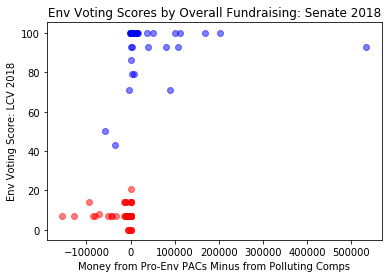

In [58]:
df18_total_R = df18_total[df18_total['RecipientCandidateParty']=='Republican'][['LCV_Score','sum_total','RecipientCandidateParty']]
df18_total_D = df18_total[df18_total['RecipientCandidateParty']=='Democratic'][['LCV_Score','sum_total','RecipientCandidateParty']]
x_R = df18_total_R['sum_total']
x_D = df18_total_D['sum_total']
y_R = df18_total_R['LCV_Score']
y_D = df18_total_D['LCV_Score']
plt.scatter(x_R, y_R, c='red', alpha=0.5)
plt.scatter(x_D, y_D, c='blue', alpha=0.5)
plt.title("Env Voting Scores by Overall Fundraising: Senate 2018")
plt.xlabel("Money from Pro-Env PACs Minus from Polluting Comps")
plt.ylabel("Env Voting Score: LCV 2018")
plt.show()

In [59]:
df18_total.head(10)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro,sum_total
0,Senate,AK,Dan Sullivan,Republican,7,0,0,-7700
1,Senate,AK,Lisa Murkowski,Republican,14,0,0,-13500
2,Senate,AL,Doug Jones,Democratic,79,15237,4,7487
3,Senate,AL,Richard Shelby,Republican,7,0,0,0
4,Senate,AR,John Boozman,Republican,7,0,0,0
5,Senate,AR,Thomas Cotton,Republican,0,0,0,-6400
6,Senate,AZ,Jeff Flake,Republican,7,0,0,-79800
7,Senate,AZ,John Mccain,Republican,0,0,0,0
8,Senate,CA,Dianne Feinstein,Democratic,93,6600,1,4100
9,Senate,CA,Kamala D Harris,Democratic,100,2102,1,803


In [83]:
df18_total = df18_total.replace({'RecipientCandidateParty': 'Democratic'}, 1)
df18_total = df18_total.replace({'RecipientCandidateParty': 'Republican'}, 0)
df18_total.head(10)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro,sum_total
0,Senate,AK,Dan Sullivan,0,7,0,0,-7700
1,Senate,AK,Lisa Murkowski,0,14,0,0,-13500
2,Senate,AL,Doug Jones,1,79,15237,4,7487
3,Senate,AL,Richard Shelby,0,7,0,0,0
4,Senate,AR,John Boozman,0,7,0,0,0
5,Senate,AR,Thomas Cotton,0,0,0,0,-6400
6,Senate,AZ,Jeff Flake,0,7,0,0,-79800
7,Senate,AZ,John Mccain,0,0,0,0,0
8,Senate,CA,Dianne Feinstein,1,93,6600,1,4100
9,Senate,CA,Kamala D Harris,1,100,2102,1,803


In [84]:
import statsmodels.api as sm
y = df18_total['LCV_Score']
X = df18_total[['RecipientCandidateParty','sum_total']]
X['weight'] = 1
X

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,RecipientCandidateParty,sum_total,weight
0,0,-7700,1
1,0,-13500,1
2,1,7487,1
3,0,0,1
4,0,0,1
5,0,-6400,1
6,0,-79800,1
7,0,0,1
8,1,4100,1
9,1,803,1


In [85]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LCV_Score   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1111.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.37e-67
Time:                        09:51:56   Log-Likelihood:                -362.49
No. Observations:                 100   AIC:                             731.0
Df Residuals:                      97   BIC:                             738.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RecipientCandidateParty    86.3564      1.977     43.686      0.000      82.433      90.280
sum_total                1.133e-05   1.41e-05      0.801      0.425   -1.67e-05    3.94e-05
weight                      7.9175      1.318      6.009      0.000       5.302      10.533
==============================================================================
Omnibus:                       96.405   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              928.576
Skew:                          -3.236   Prob(JB):                    2.30e-202
Kurtosis:                      16.453   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

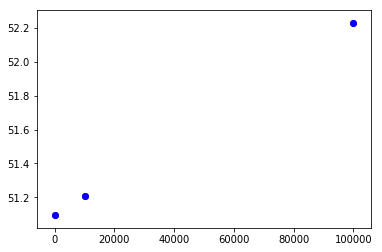

In [82]:
data_R = [[0, 0, 1], [0, 10000, 1], [0, 100000, 1]]
xx_R = pd.DataFrame(data, columns = ['RecipientCandidateParty', 'sum_total', 'weight'])
plt.scatter(xx_R['sum_total'], results.predict(xx_R), c='red')
data_D = [[1, 0, 1], [1, 10000, 1], [1, 100000, 1]]
xx_D = pd.DataFrame(data, columns = ['RecipientCandidateParty', 'sum_total', 'weight'])
plt.scatter(xx_D['sum_total'], results.predict(xx_D), c='blue')
plt.show()

In [86]:
df10_con = pd.read_excel('senate_env13_10con.xlsx')
df12_con = pd.read_excel('senate_env13_12con.xlsx')
df10_pro = pd.read_excel('senate_env13_10pro.xlsx')
df12_pro = pd.read_excel('senate_env13_12pro.xlsx')
df12_pro['sum'] = df12_pro.loc[:,'LCV12':].sum(axis=1)
df12_pro['counts'] = df12_pro.loc[:,'LCV12':'EnvAm12'].gt(1).sum(axis=1)
df12_con['sum'] = df12_con.loc[:,'koch12':].sum(axis=1)
df12_con['counts'] = df12_con.loc[:,'koch12':'FreeMc12'].gt(1).sum(axis=1)

In [87]:
df12_con[df12_con['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch12,MarPet12,MarOil12,EnTrans12,...,Cont12,Edison12,Otis12,AllCoal12,AllRes12,Murray12,NatMin12,FreeMc12,sum,counts
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100,0,0,0,0,...,0,0,0,0,0,0,0,0,250,1


In [88]:
df12_pro = df12_pro.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df12_con = df12_con.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df12_pro.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV12,Sierra12,Nature12,EDF12,GloGreen12,EnvAm12,sum,counts
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,0,0,0,0,0,0,0,0
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,0,0,0,0,0,0
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,0,0,0,0


In [90]:
df12_pro.tail()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LCV12,Sierra12,Nature12,EDF12,GloGreen12,EnvAm12,sum,counts
95,Senate,WI,Tammy Baldwin,Democratic,Open Seat,100,95308,4115,250,750,0,500,100923,5
96,Senate,WV,Joe Manchin Iii,Democratic,Incumbent,38,0,0,0,0,0,0,0,0
97,Senate,WV,John Rockefeller,Democratic,NaN,85,0,0,0,0,0,0,0,0
98,Senate,WY,John Barrasso,Republican,Incumbent,0,0,0,0,0,0,0,0,0
99,Senate,WY,Michael Enzi,Republican,NaN,0,0,0,0,0,0,0,0,0


In [92]:
df12_total = df12_pro[['RecipientCandidateOffice','RecipientCandidateOfficeState','RecipientCandidateNameNormalized','RecipientCandidateParty','LCV_Score','sum','counts']]
df12_total.rename(columns={'sum':'sum_pro', 'counts':'counts_pro'}, inplace=True)
df12_total.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro
0,Senate,AK,Lisa Murkowski,Republican,38,0,0
1,Senate,AK,Mark Begich,Democratic,77,0,0
2,Senate,AL,Jefferson Sessions,Republican,15,0,0
3,Senate,AL,Richard Shelby,Democratic,23,0,0
4,Senate,AR,John Boozman,Republican,15,0,0


In [93]:
df12_con.rename(columns={'sum':'sum_con', 'counts':'counts_con'}, inplace=True)
df12_con.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,koch12,MarPet12,MarOil12,EnTrans12,...,Cont12,Edison12,Otis12,AllCoal12,AllRes12,Murray12,NatMin12,FreeMc12,sum_con,counts_con
0,Senate,AK,Lisa Murkowski,Republican,NaN,38,5000,0,0,0,...,1500,250,0,0,0,0,0,0,20750,6
1,Senate,AK,Mark Begich,Democratic,NaN,77,0,0,0,0,...,0,21500,0,0,0,0,1000,500,29000,5
2,Senate,AL,Jefferson Sessions,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Democratic,NaN,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df12_total['sum_total'] = df12_total['sum_pro'] - df12_con['sum_con']
df12_total.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro,sum_total
0,Senate,AK,Lisa Murkowski,Republican,38,0,0,-20750
1,Senate,AK,Mark Begich,Democratic,77,0,0,-29000
2,Senate,AL,Jefferson Sessions,Republican,15,0,0,0
3,Senate,AL,Richard Shelby,Democratic,23,0,0,0
4,Senate,AR,John Boozman,Republican,15,0,0,0
5,Senate,AR,Mark Pryor,Democratic,54,0,0,-10500
6,Senate,AZ,Jeff Flake,Republican,23,0,0,-133902
7,Senate,AZ,John Mccain,Republican,31,0,0,0
8,Senate,CA,Barbara Boxer,Democratic,100,0,0,0
9,Senate,CA,Dianne Feinstein,Democratic,92,500,1,-24000


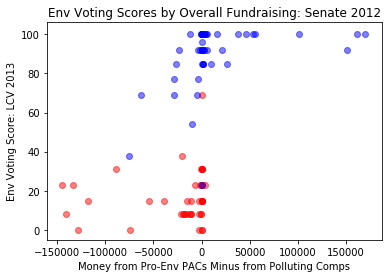

In [95]:
df12_total_R = df12_total[df12_total['RecipientCandidateParty']=='Republican'][['LCV_Score','sum_total','RecipientCandidateParty']]
df12_total_D = df12_total[df12_total['RecipientCandidateParty']=='Democratic'][['LCV_Score','sum_total','RecipientCandidateParty']]
x_R = df12_total_R['sum_total']
x_D = df12_total_D['sum_total']
y_R = df12_total_R['LCV_Score']
y_D = df12_total_D['LCV_Score']
plt.scatter(x_R, y_R, c='red', alpha=0.5)
plt.scatter(x_D, y_D, c='blue', alpha=0.5)
plt.title("Env Voting Scores by Overall Fundraising: Senate 2012")
plt.xlabel("Money from Pro-Env PACs Minus from Polluting Comps")
plt.ylabel("Env Voting Score: LCV 2013")
plt.show()

In [96]:
df12_total = df12_total.replace({'RecipientCandidateParty': 'Democratic'}, 1)
df12_total = df12_total.replace({'RecipientCandidateParty': 'Republican'}, 0)
df12_total.head(10)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,LCV_Score,sum_pro,counts_pro,sum_total
0,Senate,AK,Lisa Murkowski,0,38,0,0,-20750
1,Senate,AK,Mark Begich,1,77,0,0,-29000
2,Senate,AL,Jefferson Sessions,0,15,0,0,0
3,Senate,AL,Richard Shelby,1,23,0,0,0
4,Senate,AR,John Boozman,0,15,0,0,0
5,Senate,AR,Mark Pryor,1,54,0,0,-10500
6,Senate,AZ,Jeff Flake,0,23,0,0,-133902
7,Senate,AZ,John Mccain,0,31,0,0,0
8,Senate,CA,Barbara Boxer,1,100,0,0,0
9,Senate,CA,Dianne Feinstein,1,92,500,1,-24000


In [97]:
import statsmodels.api as sm
y = df12_total['LCV_Score']
X = df12_total[['RecipientCandidateParty','sum_total']]
X['weight'] = 1
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LCV_Score   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     347.5
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           5.89e-45
Time:                        10:09:55   Log-Likelihood:                -404.00
No. Observations:                 100   AIC:                             814.0
Df Residuals:                      97   BIC:                             821.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RecipientCandidateParty    70.7257      3.043     23.244      0.000      64.687      76.765
sum_total                8.492e-05   3.23e-05      2.632      0.010    2.09e-05       0.000
weight                     18.9198      2.257      8.381      0.000      14.439      23.400
==============================================================================
Omnibus:                       40.161   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.988
Skew:                          -1.166   Prob(JB):                     5.56e-42
Kurtosis:                       9.337   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""